In [2]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Ex. 1

Считая нормальным распределение вектора цены и числа страниц, смоделировать бцтстрэп-выборки коэффициэнтов корреляции между ценой на амазоне и числом страниц. Использовать Pivotal и Percentile бутстрэп для построения доверительного интервала. Можно ли утверждать, что зависимость есть?  

In [3]:
def bootsrtap_samples(data, n):
    inds = np.random.choice(np.arange(len(data)), size=(n, len(data)))
    return data[inds]

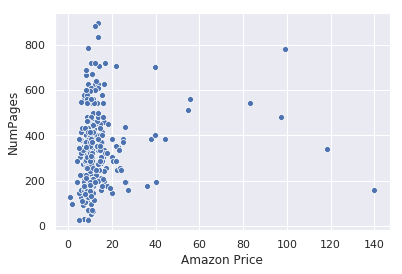

In [4]:
df = pd.read_csv('amazon-books.txt', sep='\t')
cols = ['Amazon Price', 'NumPages']
df.dropna(subset=cols, inplace=True)

_ = sns.scatterplot(cols[0], cols[1], data=df)

In [5]:
df[cols].corr()

,Amazon Price,NumPages
Amazon Price,1.000000,0.129688
NumPages,0.129688,1.000000


In [6]:
theta = df[cols].corr().values[0,1]

In [7]:
b_data = bootsrtap_samples(df[cols].values, n=5000)
b_data.shape

(5000, 323, 2)

In [8]:
std_prod = b_data.std(axis=1).prod(axis=-1)
cov = (b_data - b_data.mean(axis=1).reshape(-1, 1, 2)).prod(axis=-1).mean(axis=-1)
b_theta = cov / std_prod
b_theta.sort()

##### Percentile method

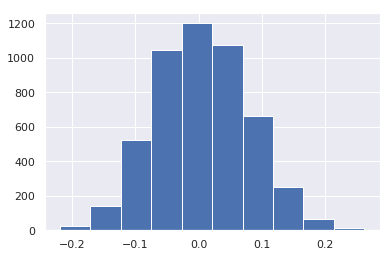

In [9]:
_ = plt.hist(b_theta - theta)

По графику видно, что гистограмма разброса смещения симметрична и сосредоточена в нуле, следовательно мы можем использовать данный метод для построения доверительного интервала

In [10]:
alpha = 0.01
gamma = 0.005
beta = 1 - alpha + gamma
t1, t2 = b_theta[round(gamma * len(b_theta))], b_theta[round(beta * len(b_theta))]

In [11]:
print(f'Confidence interval: ({t1:.4f}, {t2:.4f})')

Confidence interval: (-0.0378, 0.3244)


Поскольку при нашем уровне значимости 0 попадает в наш доверительный интервал, то мы не можем утверждать, что есть зависимость между ценой и количеством страниц

##### Pivotal method

In [12]:
alpha = 0.01
gamma = 0.005
beta = 1 - alpha + gamma
delta = b_theta - theta
t1, t2 = theta - delta[round(beta * len(delta))], theta - delta[round(gamma * len(delta))]
print(f'Confidence interval: ({t1:.4f}, {t2:.4f})')

Confidence interval: (-0.0651, 0.2971)


Поскольку при нашем уровне значимости 0 попадает в наш доверительный интервал, то мы не можем утверждать, что есть зависимость между ценой и количеством страниц

### Ex. 2

Для доли мальчиков из файла babysamp-98.txt:

    1) Построить асимптотический доверительный интервал 
    2) Построить точный доверительный интервал, используя биномиальное распределение

In [13]:
df = pd.read_csv('babysamp-98.txt', sep='\t')
df.sex = df.sex.apply(lambda x: 1 if x == 'M' else 0)

In [14]:
alpha = 0.05
p = df.sex.mean()
se = (p * (1-p) / len(df))**0.5
z = scipy.stats.norm(0, 1)
print(f'Asymptotic confidence interval: ({p - z.ppf(1 - alpha/2) * se: .4f}, {p + z.ppf(1 - alpha/2) * se: .4f})')

Asymptotic confidence interval: ( 0.4457,  0.5843)


In [15]:
n = len(df)
k = df.sex.sum()
p1 = k / (k + (n - k + 1) * scipy.stats.f.ppf(1 - alpha/2, 2 * (n - k + 1), 2 * k))
p2 = (k + 1) / (k + 1 + (n - k) * scipy.stats.f.ppf(alpha / 2, 2 * (n - k), 2 * (k + 1)))
print(f'Confidence interval: ({p1:.4f}, {p2:.4f})')

Confidence interval: (0.4435, 0.5861)


### Ex. 3

Предполагая нормальность распределения пробега построить доверительный интервал для среднего пробега

    a) Точный на основе распределния Стьюдента
    б) Асимптотический на основе нормального распределния
    в) Бутстрэпом, испольщуя метод Normal

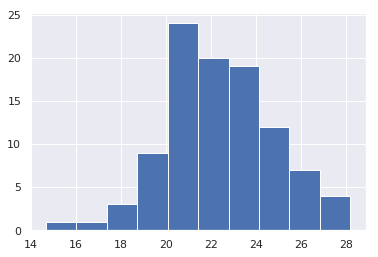

In [16]:
df = pd.read_csv('nissan.txt')
_ = df.mpg.hist()

##### Точный доверительный интервал

In [17]:
alpha = 0.05
mu, s, n = df.mpg.mean(), df.mpg.std() , len(df)
t = scipy.stats.t(n - 1)
print(f'Confidence interval: ({mu - t.ppf(1-alpha/2)*s/n**0.5:.4f}, {mu + t.ppf(1-alpha/2)*s/n**0.5:.4f})')

Confidence interval: (21.9264, 22.8976)


##### Асимптотический доверительный интервал

In [18]:
alpha = 0.05
mu, s, n = df.mpg.mean(), df.mpg.std() , len(df)
z = scipy.stats.norm()
print(f'Confidence interval: ({mu - z.ppf(1-alpha/2)*s/n**0.5:.4f}, {mu + z.ppf(1-alpha/2)*s/n**0.5:.4f})')

Confidence interval: (21.9324, 22.8916)


##### Бутстрэп

In [19]:
b_mu = bootsrtap_samples(df.mpg.values, 3000).mean(axis=1)
b_mu.shape

(3000,)

In [20]:
bs = b_mu.std()
print(f'Confidence interval: ({mu - z.ppf(1-alpha/2)*bs:.4f}, {mu + z.ppf(1-alpha/2)*bs:.4f})')

Confidence interval: (21.9415, 22.8825)


Как видно по результатам, точный доверительный интервал получился шире чем остальные, это связано с тем что распределение Стьюдента имеет более тяжелые хвосты по сравнению с нормальным распределнием. Это совпадает с нашей интуицией поскольку нам дана лишь оценка дисперсии, то следовательно у нас меньше информации об исходном распределении, следовательно и уверенности у нас тоже меньше.

Также видим, что бутсрэп интервал получился уже чем остальные